# Pricipal Componenets Analysis (PCA)

It has 4 steps 
1) Data Standardization 
2) Calculate the Covariance 
3) Find the principal components 
4) Transform the data (Visualization and Analysis). But first we need to do: 1) Data consolidation and 2) Data Pre-processing and cleaning.

## Data Cleaning and Pre-processing: 

Check for missing or inconsistent data and decide how to handle it (e.g., imputation or removal).
Ensure that all data types are correct (e.g., DATE should be a date type, HOUR_0 to HOUR_23 should be numeric). For example, for applying Imputation on non-numeric data (objects) for handling Nan values, first we need to convert them to a numeric. However, HOUR_0 to HOUR_23 were by default float.
Convert categorical variables like ISPRIVATEPERSON into a numerical form that PCA can work with, using encoding methods like One-Hot Encoding or Label Encoding.
Exclude non-numeric columns like CUSTOMER and AREA from PCA, or find a way to numerically encode them if they are relevant to your analysis.

In [1]:
import utils.KEprocessing

# List of filenames
filenames = ['data/lnu_2020.csv', 'data/lnu_2021.csv', 'data/lnu_2022.csv', 'data/lnu_2023.csv']
combined_df = utils.KEprocessing.consolidate_data(filenames)

In [3]:
# Check the data types for each DataFrame
print('Data types for combined_df:')
print(combined_df.dtypes)

Data types for combined_df:
CUSTOMER                    int64
AREA                       object
ISPRIVATEPERSON            object
DATE               datetime64[ns]
HOUR_0                    float64
HOUR_1                    float64
HOUR_2                    float64
HOUR_3                    float64
HOUR_4                    float64
HOUR_5                    float64
HOUR_6                    float64
HOUR_7                    float64
HOUR_8                    float64
HOUR_9                    float64
HOUR_10                   float64
HOUR_11                   float64
HOUR_12                   float64
HOUR_13                   float64
HOUR_14                   float64
HOUR_15                   float64
HOUR_16                   float64
HOUR_17                   float64
HOUR_18                   float64
HOUR_19                   float64
HOUR_20                   float64
HOUR_21                   float64
HOUR_22                   float64
HOUR_23                   float64
YEAR                

## Power usage per year to see the outliers

(High values compared to the power usage threshold which I defined for Residential:0.05MWh and Commercial:15MWh, negative values, and Nan values)

In [ ]:
import matplotlib.pyplot as plt

# List of unique years in the data
years = combined_df['YEAR'].unique()

# Plotting boxplots for each year
for year in years:
    # Selecting only the data for current year
    year_data = combined_df[combined_df['YEAR'] == year]
    
    # Selecting only the hour columns
    hours_data = year_data.filter(regex='^HOUR_')

    # Plotting
    plt.figure(figsize=(15, 5))
    hours_data.boxplot()
    plt.title(f'Hourly Power Consumption Boxplot for {year}')
    plt.ylabel('Power Consumption (MWh)')
    plt.xlabel('Hour of the Day')
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.show()

## Quantify how many NaN values there are

In [7]:
# Get unique years in the data
years = combined_df['YEAR'].unique()

# Count NaN values for each year
for year in years:
    nan_count = combined_df[combined_df['YEAR'] == year].isna().sum().sum()
    print(f"NaN values in year {year}: {nan_count}")

NaN values in year 2020: 12365
NaN values in year 2021: 29255
NaN values in year 2022: 7039
NaN values in year 2023: 0


In [9]:
for year in years:
    nan_rows = combined_df[combined_df['YEAR'] == year][combined_df.isna().any(axis=1)]
    print(f"Rows with NaN values in {year} DataFrame:")
    print(nan_rows)
    print("\n")

/var/folders/gv/7bjgqyhj6td4g_cktv1tvblw0000gq/T/ipykernel_10088/1554872401.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nan_rows = combined_df[combined_df['YEAR'] == year][combined_df.isna().any(axis=1)]


Rows with NaN values in 2020 DataFrame:
          CUSTOMER         AREA ISPRIVATEPERSON       DATE  HOUR_0  HOUR_1  \
3744    1060598943  Kvarnholmen             Nej 2020-01-10     NaN     NaN   
8245    1060599104  Kvarnholmen             Nej 2020-05-06     NaN     NaN   
9584    1060599315  Kvarnholmen             Nej 2020-01-02   0.003   0.003   
9585    1060599315  Kvarnholmen             Nej 2020-01-08     NaN     NaN   
13970   1060599939  Kvarnholmen             Nej 2020-06-17     NaN     NaN   
...            ...          ...             ...        ...     ...     ...   
277190  1969676870        Berga             Nej 2020-11-30     NaN     NaN   
277222  1969676874        Berga             Nej 2020-11-19     NaN     NaN   
277265  1969676878        Berga             Nej 2020-11-17     NaN     NaN   
277310  1969676882        Berga             Nej 2020-11-17     NaN     NaN   
277355  1969676886        Berga             Nej 2020-11-17     NaN     NaN   

        HOUR_2  HOUR_3 

/var/folders/gv/7bjgqyhj6td4g_cktv1tvblw0000gq/T/ipykernel_10088/1554872401.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nan_rows = combined_df[combined_df['YEAR'] == year][combined_df.isna().any(axis=1)]


Rows with NaN values in 2021 DataFrame:
          CUSTOMER         AREA ISPRIVATEPERSON       DATE  HOUR_0  HOUR_1  \
279276  1060598781  Kvarnholmen             Nej 2021-07-27   0.000   0.000   
279400  1060598781  Kvarnholmen             Nej 2021-11-28   0.000   0.000   
279401  1060598781  Kvarnholmen             Nej 2021-11-29   0.000   0.000   
281957  1060598956  Kvarnholmen             Nej 2021-01-18     NaN     NaN   
281960  1060598956  Kvarnholmen             Nej 2021-01-22     NaN     NaN   
...            ...          ...             ...        ...     ...     ...   
574323  1969676870        Berga             Nej 2021-02-09   0.003   0.003   
574363  1969676874        Berga             Nej 2021-02-09   0.003   0.004   
574403  1969676878        Berga             Nej 2021-02-09   0.004   0.004   
574443  1969676882        Berga             Nej 2021-02-09   0.003   0.003   
574483  1969676886        Berga             Nej 2021-02-09   0.005   0.004   

        HOUR_2  HOUR_3 

/var/folders/gv/7bjgqyhj6td4g_cktv1tvblw0000gq/T/ipykernel_10088/1554872401.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nan_rows = combined_df[combined_df['YEAR'] == year][combined_df.isna().any(axis=1)]


Rows with NaN values in 2022 DataFrame:
           CUSTOMER         AREA ISPRIVATEPERSON       DATE  HOUR_0  HOUR_1  \
586859   1060598781  Kvarnholmen             Nej 2022-04-20   0.000   0.000   
587029   1060598788  Kvarnholmen             Nej 2022-04-20   0.000   0.001   
590101   1060598956  Kvarnholmen             Nej 2022-01-01     NaN     NaN   
590102   1060598956  Kvarnholmen             Nej 2022-01-02     NaN     NaN   
590103   1060598956  Kvarnholmen             Nej 2022-01-03     NaN     NaN   
...             ...          ...             ...        ...     ...     ...   
1240126  1919047861  Kvarnholmen             Nej 2022-02-09   0.001   0.001   
1276373  2244169945        Berga             Nej 2022-11-01     NaN     NaN   
1276434  2244169951        Berga             Nej 2022-11-01     NaN     NaN   
1276495  2261780058       Malmen              Ja 2022-12-21     NaN     NaN   
1276506  2261780064       Malmen              Ja 2022-12-21     NaN     NaN   

         HO

/var/folders/gv/7bjgqyhj6td4g_cktv1tvblw0000gq/T/ipykernel_10088/1554872401.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nan_rows = combined_df[combined_df['YEAR'] == year][combined_df.isna().any(axis=1)]


## ROW-WISE MEAN IMPUTATION  

## Mean Imputation is by default column-wise which means imputation strategy will replace missing values (NaNs) with the mean value of the respective column.
## Apply row-wise Mean Imputation which means: replacing all the outliers: (High values compared to the power usage threshold which I defined for Residential:0.03MWh and Commercial:3MWh, negative values, and Nan values).

## If we are still seeing null values after performing the row-wise mean imputation, it could be due to that all values in a row are NaN or invalid: If an entire row (for all the hourly columns) consists of NaN or invalid values, the mean would also be NaN since there are no valid values to calculate the mean from. Ex: Customer id 1060676202 in 2020 Solution: define the minimum number of non-NaN hourly values required to keep a row.

In [10]:
!pip install numpy

In [11]:
def replace_invalid_with_row_mean(df, residential_threshold, commercial_threshold, min_non_nan=3):
    # Operate only on the hour columns
    hour_columns = [f'HOUR_{i}' for i in range(24)]
    
    # Filter out rows that don't meet the threshold for non-NaN values
    df_filtered = df.dropna(thresh=min_non_nan, subset=hour_columns)
    
    # Determine thresholds based on customer type
    thresholds = df_filtered['ISPRIVATEPERSON'].map(lambda x: residential_threshold if x == 'Ja' else commercial_threshold)
    
    # Mask the values that are either above their respective thresholds or negative
    df_filtered[hour_columns] = df_filtered[hour_columns].mask((df_filtered[hour_columns] < 0) | (df_filtered[hour_columns].gt(thresholds, axis=0)))
    
    # Calculate the mean for each row excluding NaNs
    row_means = df_filtered[hour_columns].mean(axis=1)
    
    # Replace NaNs with the row's mean
    df_filtered[hour_columns] = df_filtered[hour_columns].apply(lambda x: x.fillna(row_means[x.name]), axis=1)
    
    return df_filtered

# Define your thresholds
residential_threshold = 0.03  # 0.03 MWh for residential
commercial_threshold = 3      # 3 MWh for commercial

# Define the minimum number of non-NaN hourly values required to keep a row
min_non_nan_values = 3

# Apply the function to the combined DataFrame
combined_df = replace_invalid_with_row_mean(combined_df, residential_threshold, commercial_threshold, min_non_nan_values)

/var/folders/gv/7bjgqyhj6td4g_cktv1tvblw0000gq/T/ipykernel_10088/1862490935.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[hour_columns] = df_filtered[hour_columns].mask((df_filtered[hour_columns] < 0) | (df_filtered[hour_columns].gt(thresholds, axis=0)))
/var/folders/gv/7bjgqyhj6td4g_cktv1tvblw0000gq/T/ipykernel_10088/1862490935.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[hour_columns] = df_filtered[hour_columns].apply(lambda x: x.fillna(row_means[x.name]), axis=1)


In [12]:
combined_df.isnull().sum() 

CUSTOMER           0
AREA               0
ISPRIVATEPERSON    0
DATE               0
HOUR_0             0
HOUR_1             0
HOUR_2             0
HOUR_3             0
HOUR_4             0
HOUR_5             0
HOUR_6             0
HOUR_7             0
HOUR_8             0
HOUR_9             0
HOUR_10            0
HOUR_11            0
HOUR_12            0
HOUR_13            0
HOUR_14            0
HOUR_15            0
HOUR_16            0
HOUR_17            0
HOUR_18            0
HOUR_19            0
HOUR_20            0
HOUR_21            0
HOUR_22            0
HOUR_23            0
YEAR               0
dtype: int64

In [13]:
combined_df['AREA'].unique()

array(['Kvarnholmen', 'Malmen', 'Berga', 'Stensö'], dtype=object)

In [14]:
combined_df # Before row-wise imputation rules: 3614805 rows After row-wise imputation rules: 3612918

,CUSTOMER,AREA,ISPRIVATEPERSON,DATE,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,...,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23,YEAR
0,1060598736,Kvarnholmen,Nej,2020-01-01,0.011,0.012,0.012,0.012,0.013,0.012,...,0.010,0.009,0.010,0.010,0.011,0.011,0.011,0.010,0.010,2020
1,1060598736,Kvarnholmen,Nej,2020-01-02,0.010,0.009,0.009,0.009,0.010,0.009,...,0.009,0.009,0.010,0.010,0.009,0.011,0.011,0.011,0.010,2020
2,1060598736,Kvarnholmen,Nej,2020-01-03,0.011,0.011,0.011,0.010,0.010,0.010,...,0.010,0.010,0.011,0.011,0.011,0.011,0.010,0.010,0.011,2020
3,1060598736,Kvarnholmen,Nej,2020-01-04,0.010,0.009,0.009,0.009,0.010,0.009,...,0.011,0.011,0.012,0.008,0.009,0.011,0.012,0.011,0.011,2020
4,1060598736,Kvarnholmen,Nej,2020-01-05,0.011,0.011,0.010,0.011,0.011,0.011,...,0.012,0.011,0.012,0.011,0.012,0.011,0.011,0.011,0.011,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614800,2411311923,Malmen,Ja,2023-12-27,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2023
3614801,2411311923,Malmen,Ja,2023-12-28,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2023
3614802,2411311923,Malmen,Ja,2023-12-29,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2023
3614803,2411311923,Malmen,Ja,2023-12-30,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2023


## Test if there is still any Nan values in the dataframe!

In [15]:
# Find rows in combined_df that still have any null values
rows_with_nan = combined_df[combined_df.isnull().any(axis=1)]

# Display the rows with NaN values
print(rows_with_nan)

Empty DataFrame
Columns: [CUSTOMER, AREA, ISPRIVATEPERSON, DATE, HOUR_0, HOUR_1, HOUR_2, HOUR_3, HOUR_4, HOUR_5, HOUR_6, HOUR_7, HOUR_8, HOUR_9, HOUR_10, HOUR_11, HOUR_12, HOUR_13, HOUR_14, HOUR_15, HOUR_16, HOUR_17, HOUR_18, HOUR_19, HOUR_20, HOUR_21, HOUR_22, HOUR_23, YEAR]
Index: []

[0 rows x 29 columns]


## Plot boxplot again to see the difference

In [16]:
''' import matplotlib.pyplot as plt

# List of DataFrames for iteration
dfs = [df_2020_cleaned, df_2021_cleaned, df_2022_cleaned, df_2023_cleaned]
years = ['2020', '2021', '2022', '2023']

# Plotting boxplots for each DataFrame
for df, year in zip(dfs, years):
    # Selecting only the hour columns
    hours_data = df.filter(regex='^HOUR_')
    
    # Plotting
    plt.figure(figsize=(15, 5))
    hours_data.boxplot()
    plt.title(f'Hourly Power Consumption Boxplot for {year}')
    plt.ylabel('Power Consumption (MWh)')
    plt.xlabel('Hour of the Day')
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.show()
    '''

" import matplotlib.pyplot as plt\n\n# List of DataFrames for iteration\ndfs = [df_2020_cleaned, df_2021_cleaned, df_2022_cleaned, df_2023_cleaned]\nyears = ['2020', '2021', '2022', '2023']\n\n# Plotting boxplots for each DataFrame\nfor df, year in zip(dfs, years):\n    # Selecting only the hour columns\n    hours_data = df.filter(regex='^HOUR_')\n    \n    # Plotting\n    plt.figure(figsize=(15, 5))\n    hours_data.boxplot()\n    plt.title(f'Hourly Power Consumption Boxplot for {year}')\n    plt.ylabel('Power Consumption (MWh)')\n    plt.xlabel('Hour of the Day')\n    plt.xticks(rotation=90)\n    plt.grid(False)\n    plt.show()\n    "

## Visualization 

In [17]:
customer_counts = combined_df.groupby('ISPRIVATEPERSON')['CUSTOMER'].nunique()
customer_counts

ISPRIVATEPERSON
Ja     5097
Nej    1388
Name: CUSTOMER, dtype: int64

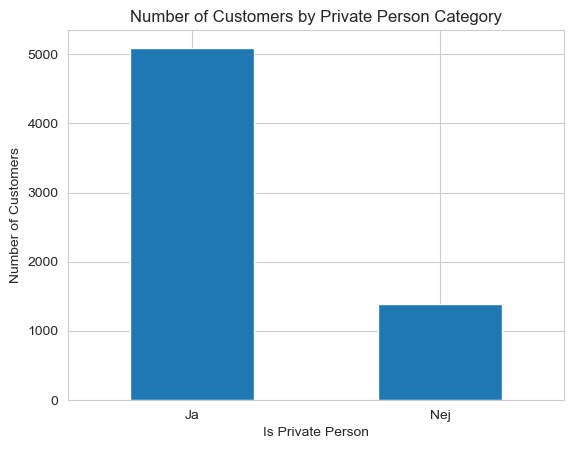

In [18]:
import matplotlib.pyplot as plt
customer_counts.plot(kind='bar')
plt.title('Number of Customers by Private Person Category')
plt.xlabel('Is Private Person')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)  # To keep the labels on the x-axis vertical
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a pandas DataFrame named 'data'
# Replace 'Nej' with 'Commercial', 'Ja' with 'Private', and map 'Unknown' or other values as needed
combined_df['ISPRIVATEPERSON'] = combined_df['ISPRIVATEPERSON'].map({
    'Nej': 'Commercial',
    'Ja': 'Residential',
})

# Now calculate the number of unique customers for the new categories
customer_counts = combined_df.groupby('ISPRIVATEPERSON')['CUSTOMER'].nunique()


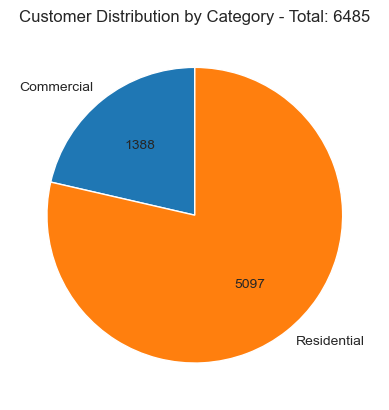

In [20]:
# Now calculate the number of unique customers for the new categories
customer_counts = combined_df.groupby('ISPRIVATEPERSON')['CUSTOMER'].nunique()

# Plot the pie chart with the actual numbers and the total
total_customers = customer_counts.sum()
customer_counts.plot(kind='pie', autopct=lambda p: f'{p * total_customers / 100 :.0f}', startangle=90, labels=customer_counts.index)
plt.title(f'Customer Distribution by Category - Total: {total_customers}')
plt.ylabel('')
plt.show()

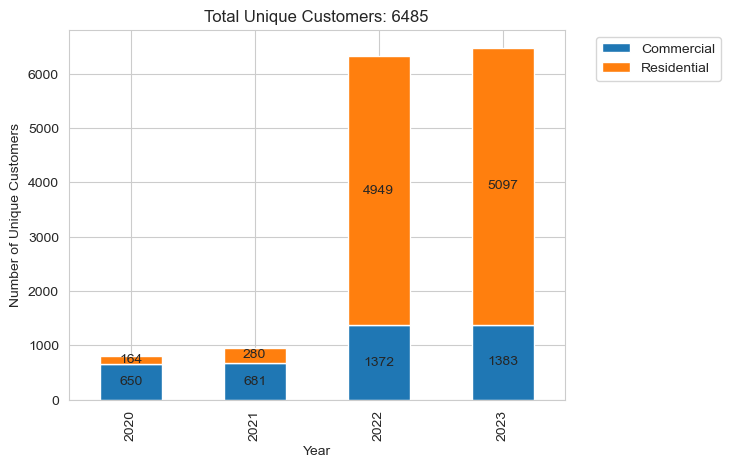

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# count unique customers per year split by category
customer_yearly = combined_df.groupby(['YEAR', 'ISPRIVATEPERSON'])['CUSTOMER'].nunique().unstack()

# Plot the stacked bar chart using seaborn
ax = customer_yearly.plot(kind='bar', stacked=True, legend=False)
# Display the total unique number of customers in combined dataframe
total_unique_customers = combined_df['CUSTOMER'].nunique()

plt.xlabel('Year')
plt.ylabel('Number of Unique Customers')

# Add labels on top of each stacked bar with the total number of customers for that year
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Move the legend outside of the plot
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a title with the total unique customers
plt.title(f'Total Unique Customers: {total_unique_customers}')

plt.show()



In [22]:
combined_df.isnull().sum()

CUSTOMER           0
AREA               0
ISPRIVATEPERSON    0
DATE               0
HOUR_0             0
HOUR_1             0
HOUR_2             0
HOUR_3             0
HOUR_4             0
HOUR_5             0
HOUR_6             0
HOUR_7             0
HOUR_8             0
HOUR_9             0
HOUR_10            0
HOUR_11            0
HOUR_12            0
HOUR_13            0
HOUR_14            0
HOUR_15            0
HOUR_16            0
HOUR_17            0
HOUR_18            0
HOUR_19            0
HOUR_20            0
HOUR_21            0
HOUR_22            0
HOUR_23            0
YEAR               0
dtype: int64

In [23]:
combined_df.isnull().mean()*100

CUSTOMER           0.0
AREA               0.0
ISPRIVATEPERSON    0.0
DATE               0.0
HOUR_0             0.0
HOUR_1             0.0
HOUR_2             0.0
HOUR_3             0.0
HOUR_4             0.0
HOUR_5             0.0
HOUR_6             0.0
HOUR_7             0.0
HOUR_8             0.0
HOUR_9             0.0
HOUR_10            0.0
HOUR_11            0.0
HOUR_12            0.0
HOUR_13            0.0
HOUR_14            0.0
HOUR_15            0.0
HOUR_16            0.0
HOUR_17            0.0
HOUR_18            0.0
HOUR_19            0.0
HOUR_20            0.0
HOUR_21            0.0
HOUR_22            0.0
HOUR_23            0.0
YEAR               0.0
dtype: float64

In [24]:
!pip install missingno

<Axes: >

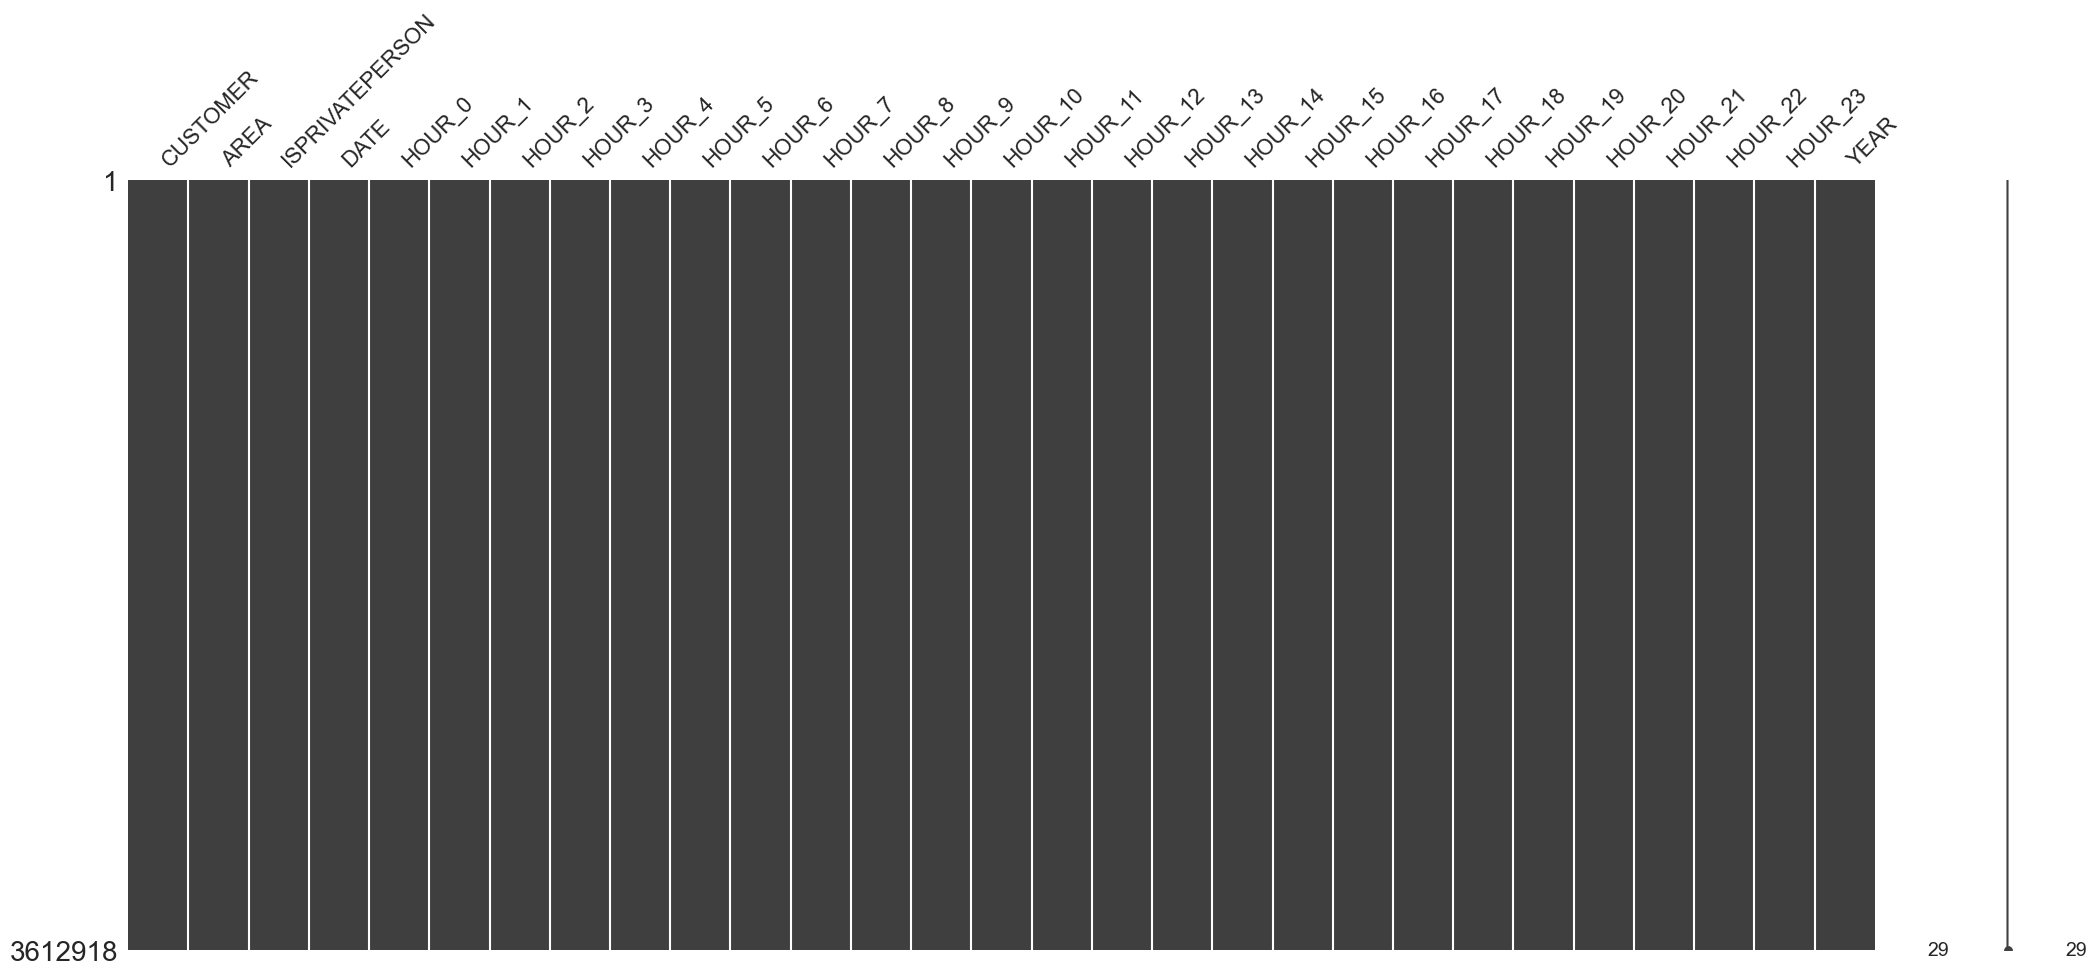

In [25]:
import missingno as msno
msno.matrix(combined_df)

In [26]:
!pip install scikit-learn

## Create column 'One_Day_Power'

In [27]:
# Define the hourly columns
hourly_columns = [f'HOUR_{i}' for i in range(24)]

# Calculate the sum of the hourly consumption for each record and create a new column 'One_Day_Power'
combined_df['One_Day_Power'] = combined_df[hourly_columns].sum(axis=1)

In [28]:
print(combined_df[['One_Day_Power']].head())

   One_Day_Power
0          0.261
1          0.228
2          0.243
3          0.243
4          0.265


In [29]:
combined_df

,CUSTOMER,AREA,ISPRIVATEPERSON,DATE,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,...,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23,YEAR,One_Day_Power
0,1060598736,Kvarnholmen,Commercial,2020-01-01,0.011,0.012,0.012,0.012,0.013,0.012,...,0.009,0.010,0.010,0.011,0.011,0.011,0.010,0.010,2020,0.261
1,1060598736,Kvarnholmen,Commercial,2020-01-02,0.010,0.009,0.009,0.009,0.010,0.009,...,0.009,0.010,0.010,0.009,0.011,0.011,0.011,0.010,2020,0.228
2,1060598736,Kvarnholmen,Commercial,2020-01-03,0.011,0.011,0.011,0.010,0.010,0.010,...,0.010,0.011,0.011,0.011,0.011,0.010,0.010,0.011,2020,0.243
3,1060598736,Kvarnholmen,Commercial,2020-01-04,0.010,0.009,0.009,0.009,0.010,0.009,...,0.011,0.012,0.008,0.009,0.011,0.012,0.011,0.011,2020,0.243
4,1060598736,Kvarnholmen,Commercial,2020-01-05,0.011,0.011,0.010,0.011,0.011,0.011,...,0.011,0.012,0.011,0.012,0.011,0.011,0.011,0.011,2020,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614800,2411311923,Malmen,Residential,2023-12-27,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2023,0.000
3614801,2411311923,Malmen,Residential,2023-12-28,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2023,0.000
3614802,2411311923,Malmen,Residential,2023-12-29,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2023,0.000
3614803,2411311923,Malmen,Residential,2023-12-30,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2023,0.000


In [30]:
# Count the number of rows with One_Day_Power equal to zero
zero_power_count = (combined_df['One_Day_Power'] == 0).sum()

print(f"Number of rows with One_Day_Power equal to zero: {zero_power_count}")

Number of rows with One_Day_Power equal to zero: 1039980


## Investigate the rows with zero in their hourly power consumption and identify the time of the year, area, and customers they belong to, you can filter your DataFrame for these rows and then examine the 'DATE', 'AREA', and 'CUSTOMER' columns

In [31]:
combined_df['AREA'].unique()

array(['Kvarnholmen', 'Malmen', 'Berga', 'Stensö'], dtype=object)

/var/folders/gv/7bjgqyhj6td4g_cktv1tvblw0000gq/T/ipykernel_10088/2335747545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_power_df['DATE'] = pd.to_datetime(zero_power_df['DATE'])
/var/folders/gv/7bjgqyhj6td4g_cktv1tvblw0000gq/T/ipykernel_10088/2335747545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_power_df['MONTH'] = zero_power_df['DATE'].dt.month


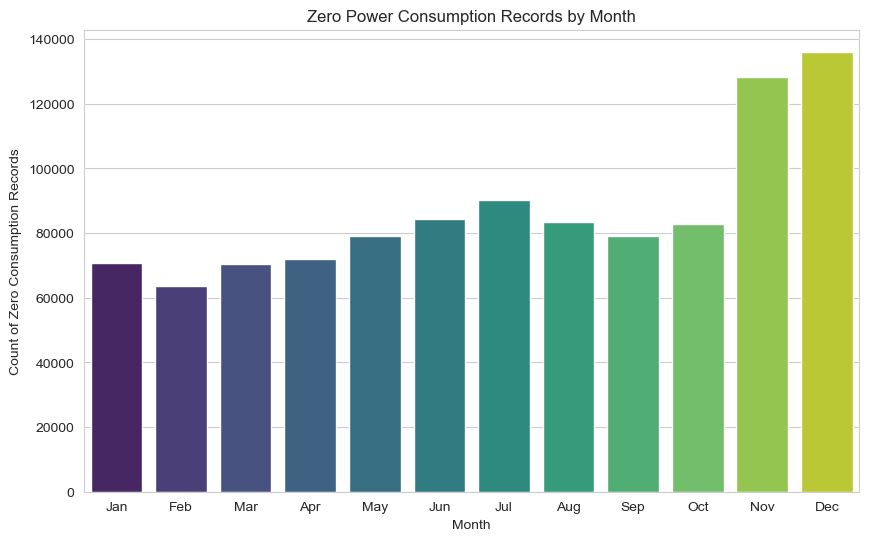

Top Areas with Zero Consumption:
AREA
Malmen         428963
Kvarnholmen    334768
Berga          207997
Stensö          68252
Name: count, dtype: int64

Top Customers with Zero Consumption:
CUSTOMER
1060608225    1461
1060696700    1461
1060621311    1461
1060603914    1459
1060753649    1459
Name: count, dtype: int64


In [32]:
# Filter rows where 'One_Day_Power' is zero
zero_power_df = combined_df[combined_df['One_Day_Power'] == 0]

# Check the distribution of these zero consumption records over different months (which can indicate seasons)
zero_power_df['DATE'] = pd.to_datetime(zero_power_df['DATE'])
zero_power_df['MONTH'] = zero_power_df['DATE'].dt.month

# Get the count of zero consumption records for each month
zero_power_by_month = zero_power_df['MONTH'].value_counts().sort_index()

# Get the count of zero consumption records for each area
zero_power_by_area = zero_power_df['AREA'].value_counts()

# Get the count of zero consumption records for each customer
zero_power_by_customer = zero_power_df['CUSTOMER'].value_counts()

# Now let's visualize the distribution over months using a bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=zero_power_by_month.index, y=zero_power_by_month.values, palette="viridis")
plt.title('Zero Power Consumption Records by Month')
plt.xlabel('Month')
plt.ylabel('Count of Zero Consumption Records')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# If needed, display the top areas and customers with zero consumption
print("Top Areas with Zero Consumption:")
print(zero_power_by_area.head())  # Adjust the number of rows to display as needed

print("\nTop Customers with Zero Consumption:")
print(zero_power_by_customer.head())  # Adjust the number of rows to display as needed

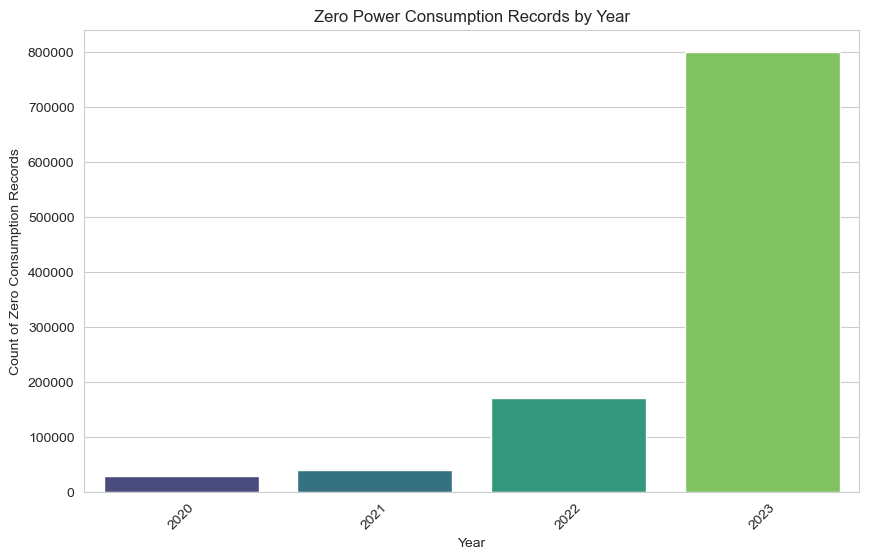

Zero Power Consumption Records by Year:
YEAR
2020     28962
2021     40227
2022    170950
2023    799841
Name: count, dtype: int64


In [33]:
# Filter rows where 'One_Day_Power' is zero
zero_power_df = combined_df[combined_df['One_Day_Power'] == 0]

# Get the count of zero consumption records for each year
zero_power_by_year = zero_power_df['YEAR'].value_counts().sort_index()

# Now let's visualize the distribution over years using a bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=zero_power_by_year.index.astype(str), y=zero_power_by_year.values, palette="viridis")
plt.title('Zero Power Consumption Records by Year')
plt.xlabel('Year')
plt.ylabel('Count of Zero Consumption Records')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

# Display the count of zero consumption records by year
print("Zero Power Consumption Records by Year:")
print(zero_power_by_year)


In [34]:
# Count the number of unique customers with zero 'One_Day_Power'
unique_zero_power_customers = zero_power_df['CUSTOMER'].nunique()

print(f"Number of unique customers with zero 'One_Day_Power': {unique_zero_power_customers}")

Number of unique customers with zero 'One_Day_Power': 5339


In [35]:

# Filter rows where 'One_Day_Power' is zero
zero_power_customers = combined_df[combined_df['One_Day_Power'] == 0]

# Group by 'AREA' and count the unique 'CUSTOMER' entries within each group
unique_customers_per_area = zero_power_customers.groupby('AREA')['CUSTOMER'].nunique()

# Display the unique number of customers per area
print(unique_customers_per_area)

AREA
Berga          1397
Kvarnholmen    1502
Malmen         2033
Stensö          407
Name: CUSTOMER, dtype: int64


          AREA  One_Day_Power
1  Kvarnholmen   87800.534625
2       Malmen   74599.123320
3       Stensö   43664.611725
0        Berga   32095.614718


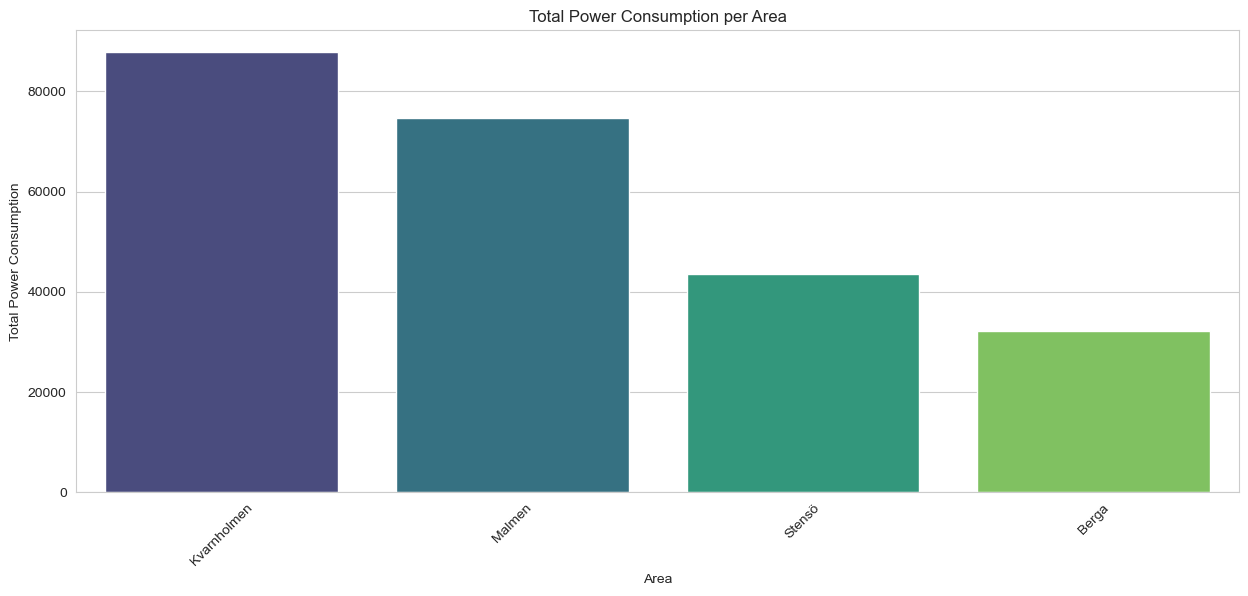

In [36]:
# Sum the 'One_Day_Power' for each area
power_consumption_per_area = combined_df.groupby('AREA')['One_Day_Power'].sum().reset_index()

# Sort the results to see the areas with the highest consumption at the top
power_consumption_per_area = power_consumption_per_area.sort_values(by='One_Day_Power', ascending=False)

# Display the power consumption per area
print(power_consumption_per_area)

# Now let's visualize the power consumption per area using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(data=power_consumption_per_area, x='AREA', y='One_Day_Power', palette="viridis")
plt.title('Total Power Consumption per Area')
plt.xlabel('Area')
plt.ylabel('Total Power Consumption')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

## Number of Customers per Area

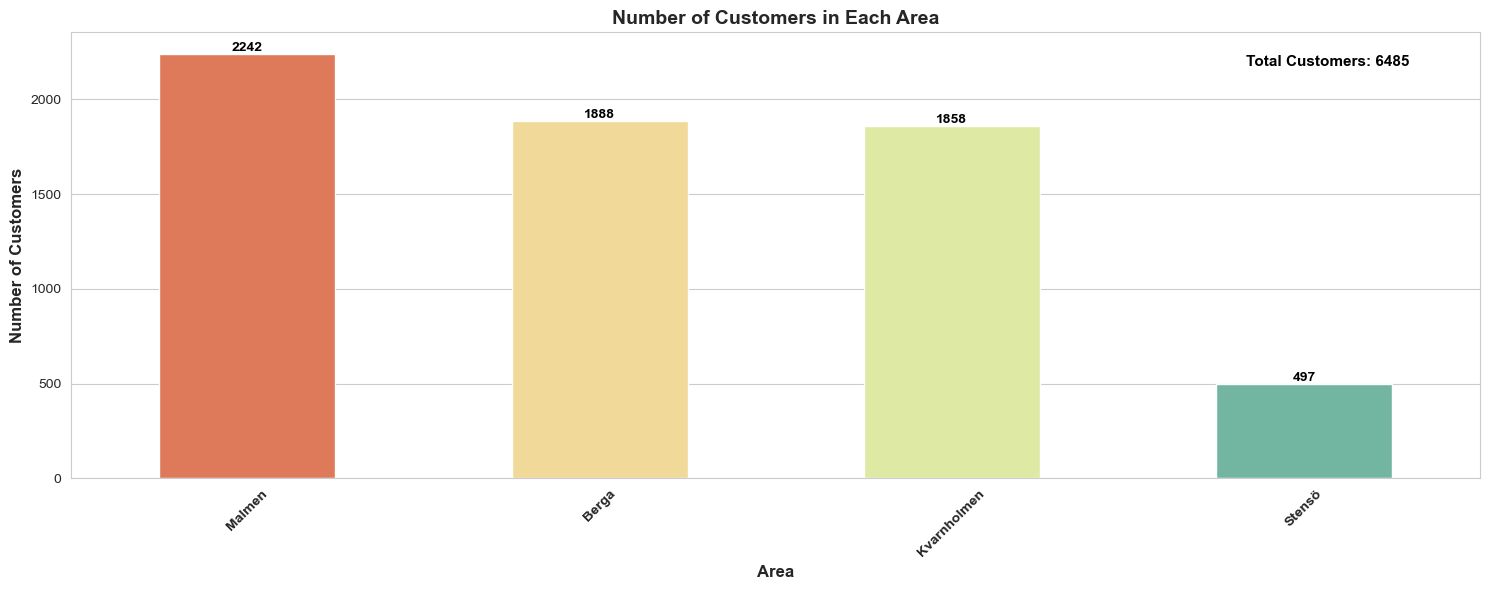

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'AREA' and count the unique number of 'CUSTOMER'
customers_per_area = combined_df.groupby('AREA')['CUSTOMER'].nunique()

# Calculate the total number of unique customers
total_customers = customers_per_area.sum()

# Convert to DataFrame and reset index for better readability
customers_per_area_df = customers_per_area.reset_index()

# Rename columns for clarity
customers_per_area_df.columns = ['AREA', 'Number of Customers']

# Sort the areas for better visualization
customers_per_area_df = customers_per_area_df.sort_values('Number of Customers', ascending=False)

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a bar chart with Seaborn with narrower bars
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x='AREA', y='Number of Customers', data=customers_per_area_df, 
                      palette='Spectral', width=0.5)  # Set width to desired value

# Rotate the x-axis labels for better readability and adjust fontsize and fontweight
plt.xticks(rotation=45, fontsize=10, fontweight='bold')

# Annotate the number of customers on top of each bar
for bar in barplot.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), 
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.xlabel('Area', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
plt.title('Number of Customers in Each Area', fontsize=14, fontweight='bold')

# Add the total number of customers in the top right corner of the plot
plt.annotate(f'Total Customers: {total_customers}', xy=(0.95, 0.95), xycoords='axes fraction',
             fontsize=11, color='black', fontweight='bold', ha='right', va='top')

# Adjust the layout to fit the x-axis labels
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/gv/7bjgqyhj6td4g_cktv1tvblw0000gq/T/ipykernel_10088/880282206.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['MONTH'] = customer_data['DATE'].dt.month


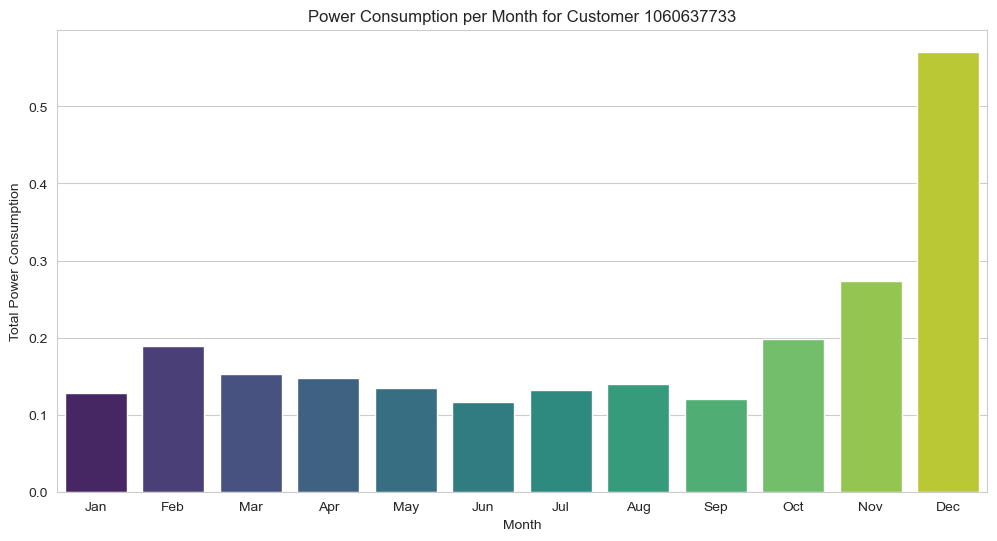

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

# Ensure 'DATE' is in datetime format
# df_combined['DATE'] = pd.to_datetime(df_combined['DATE'])

# Randomly select one customer
random_customer = random.choice(combined_df['CUSTOMER'].unique())

# Filter the DataFrame for the randomly selected customer
customer_data = combined_df[combined_df['CUSTOMER'] == random_customer]

# Extract month from 'DATE' if not already done
customer_data['MONTH'] = customer_data['DATE'].dt.month

# Group by month and sum up 'One_Day_Power'
power_consumption_per_month = customer_data.groupby('MONTH')['One_Day_Power'].sum().reset_index()

# Sort by month for chronological order
power_consumption_per_month = power_consumption_per_month.sort_values('MONTH')

# Visualize the power consumption per month using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=power_consumption_per_month, x='MONTH', y='One_Day_Power', palette="viridis")
plt.title(f'Power Consumption per Month for Customer {random_customer}')
plt.xlabel('Month')
plt.ylabel('Total Power Consumption')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
